
### **BANK CHURN PREDICTION**



In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#no. of columns and rows
data.shape
print("Number of Rows",data.shape[0])
print("Numner of Columns",data.shape[1])

Number of Rows 10000
Numner of Columns 14


In [ ]:
#Info of dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#check null values
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#overall statistics
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
#dropping irrelevant features
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

data = pd.read_csv('Churn_Modelling.csv')

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Calculate counts for Gender distribution
gender_counts = data['Gender'].value_counts()

# Add trace for Gender distribution
fig.add_trace(
    go.Pie(labels=gender_counts.index,
           values=gender_counts.values,
           name='Gender',
           marker_colors=['gold', 'mediumturquoise']),
    1, 1
)

# Calculate counts for Churn distribution
churn_counts = data['Exited'].value_counts()

# Add trace for Churn distribution
fig.add_trace(
    go.Pie(labels=churn_counts.index.astype(str),
           values=churn_counts.values,
           name='Churn',
           marker_colors=['darkorange', 'lightgreen']),
    1, 2
)


fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

# Update overall layout
fig.update_layout(
    title_text='<b>Gender and Churn Distributions</b>',
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
        dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)
    ]
)

# Display the plot
iplot(fig)




female_churn_prob = (data[data['Gender'] == 'Female']['Exited'].sum() / data['Gender'].value_counts()['Female']) * 100

male_churn_prob = (data[data['Gender'] == 'Male']['Exited'].sum() / data['Gender'].value_counts()['Male']) * 100


print(f"A female customer has a probability of {female_churn_prob:.2f}% churn")
print(f"A male customer has a probability of {male_churn_prob:.2f}% churn")

A female customer has a probability of 25.07% churn
A male customer has a probability of 16.46% churn


In [ ]:
# Specify categorical columns to encode
categorical_cols = ['Geography', 'Gender']

# Use pd.get_dummies() with the correct columns parameter
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the encoded DataFrame
print(data_encoded)


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1          

In [ ]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
!pip install --upgrade seaborn matplotlib





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-19-9c0a9711a577>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




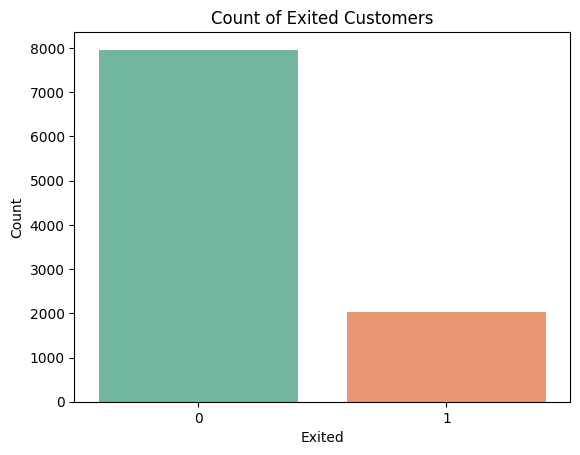

In [ ]:
palette = "Set2"

# Create the count plot with specified color palette
sns.countplot(data=data, x='Exited', palette=palette)

# Set labels and title
plt.xlabel("Exited")  # Label for the x-axis
plt.ylabel("Count")   # Label for the y-axis
plt.title("Count of Exited Customers")  # Title of the plot

# Display the plot
plt.show()


In [ ]:
#ny seeing the count plot we can see that the dataset is imbalanced dataset

X=data_encoded.drop('Exited',axis=1)
y=data_encoded['Exited']

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#oversampling with smote to solve imbalanced data
from imblearn.over_sampling import SMOTE


In [ ]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [ ]:
# Assuming y_res is a pandas Series containing labels
# Compute the frequency of unique values in y_res
#value_counts = y_res.value_counts()
y_res.value_counts()
# Print the frequency of unique values
print(y_res.value_counts())


Exited
1    7963
0    7963
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)


In [ ]:
#FEATURE SCALING=CALCULATE INSTANCES WITH DATA TO BALANCE HINGH VALUE SET KNEASRT LABEL,NUERAL NETWORKSVM,LINEAR AND LOGISTIC REF
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.66114797,  0.60474648, -1.037241  , ..., -0.75673334,
        -0.63038837,  0.80360575],
       [ 1.09716863,  0.1036688 , -1.40614333, ..., -0.75673334,
        -0.63038837,  0.80360575],
       [ 0.73745159, -0.49762441, -1.037241  , ..., -0.75673334,
        -0.63038837,  0.80360575],
       ...,
       [ 0.20332629,  0.20388434,  1.17617297, ..., -0.75673334,
        -0.63038837,  0.80360575],
       [-0.61421244,  0.70496201, -0.29943634, ...,  1.32146946,
        -0.63038837,  0.80360575],
       [ 0.53034178,  1.00560862, -1.40614333, ...,  1.32146946,
        -0.63038837,  0.80360575]])

 USING LOGISTIC REGRESSION

---

**bold text**

In [ ]:
#3Logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,y_pred1)

0.7762084118016321

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.7661596958174905

In [ ]:
recall_score(y_test,y_pred1)

0.7784932388924662

In [ ]:
f1_score(y_test,y_pred1)

0.7722772277227723

USING SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm


In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8436911487758946

In [ ]:
precision_score(y_test,y_pred2)

0.8440965427266797

USING KNEIGHBORS **CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8135593220338984

In [ ]:
precision_score(y_test,y_pred3)

0.7950769230769231

**DECISION TREE CLASSIFIER**

In [ ]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8110483364720653

In [ ]:
precision_score(y_test,y_pred4)

0.7929759704251387

**RANDOMFOREST CLASSIFIER**

In [ ]:
#RANDOMFOREST CLASSIFIER  #combines  pred of multiple decision trees
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
precision_score(y_test,y_pred5)

0.8777633289986996

In [ ]:
accuracy_score(y_test,y_pred5)

0.8772755806654112

**GRADIENT BOOSTING CLASSIFIER**

In [ ]:
#GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(X_test)

In [ ]:
precision_score(y_test,y_pred6)

0.8406169665809768

In [ ]:
accuracy_score(y_test,y_pred6)

0.8452605147520402

In [ ]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)] })

In [ ]:
final_data

,Models,ACC
0,LR,0.776208
1,SVC,0.843691
2,KNN,0.813559
3,DT,0.811048
4,RF,0.877276
5,GBC,0.845261


In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
# Sorting DataFrame by accuracy score (optional)
final_data = final_data.sort_values(by='ACC', ascending=False)

# Plotting a bar plot using Plotly Express
fig = px.bar(final_data, x='Models', y='ACC', color='Models',
             title='Accuracy of Different Models',
             labels={'Models': 'Models', 'ACC': 'Accuracy'})

# Customizing layout and appearance
fig.update_layout(
    xaxis=dict(title='Models'),
    yaxis=dict(title='Accuracy'),
    title_font_size=20,
    font=dict(size=12),
    showlegend=False  # Hide legend since color represents different models
)

# Display the plot
fig.show()

In [ ]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
                          'PREC':[precision_score(y_test,y_pred1),
                                 precision_score(y_test,y_pred2),
                                 precision_score(y_test,y_pred3),
                                 precision_score(y_test,y_pred4),
                                 precision_score(y_test,y_pred5),
                                 precision_score(y_test,y_pred6)] })

In [ ]:
final_data

,Models,PREC
0,LR,0.766160
1,SVC,0.844097
2,KNN,0.795077
3,DT,0.792976
4,RF,0.877763
5,GBC,0.840617


In [ ]:
# Sorting DataFrame by accuracy score (optional)
final_data = final_data.sort_values(by='PREC', ascending=False)

# Plotting a bar plot using Plotly Express
fig = px.bar(final_data, x='Models', y='PREC', color='Models',
             title='Accuracy of Different Models',
             labels={'Models': 'Models', 'PREC': 'precidion'})

# Customizing layout and appearance
fig.update_layout(
    xaxis=dict(title='Models'),
    yaxis=dict(title='Precision'),
    title_font_size=20,
    font=dict(size=12),
    showlegend=False  # Hide legend since color represents different models
)

# Display the plot
fig.show()

In [ ]:
#SAVE THE MODEL
X_res=sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'Bank_Churn_Prediction_Model')

['Bank_Churn_Prediction_Model']

In [ ]:
model= joblib.load('Bank_Churn_Prediction_Model')

In [ ]:
data_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
model.predict([[608,41,1,83807,1,0,3,67,33,11,11]])

array([0])

In [ ]:
from termcolor import colored  # Import colored from termcolor package (install using pip if needed)

def map_prediction_to_label(prediction):
    if prediction == 0:
        return "Yes"  # Map 0 to "Yes" (churned)
    elif prediction == 1:
        return "No"   # Map 1 to "No" (not churned)
    else:
        return "Unknown"  # Handle other cases if needed

# Prompt the user to input values for all required features
credit_score = float(input("Enter Credit Score: "))
age = int(input("Enter Age: "))
gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
balance = float(input("Enter Balance: "))
num_of_products = int(input("Enter Number of Products: "))
has_cr_card = int(input("Enter Has Credit Card (0 for No, 1 for Yes): "))
tenure = int(input("Enter Tenure (Number of Years): "))
estimated_salary = float(input("Enter Estimated Salary: "))
is_active_member = int(input("Enter IsActiveMember (0 for No, 1 for Yes): "))
geography = input("Enter Geography (France/Spain/Germany): ")

# Encode Geography feature using one-hot encoding
geography_france = 1 if geography.lower() == 'france' else 0
geography_spain = 1 if geography.lower() == 'spain' else 0
geography_germany = 1 if geography.lower() == 'germany' else 0

# Organize input features into a list matching the model's input format
input_features = [[credit_score, age, gender, balance, num_of_products,
                   has_cr_card, tenure, estimated_salary, is_active_member,
                   geography_spain, geography_germany]]

# Assuming 'model' is your trained machine learning model
# Predict using the correctly formatted input features
prediction = model.predict(input_features)

# Map the prediction to a meaningful label using the defined function
label = map_prediction_to_label(prediction[0])  # Access the first element of the prediction array

# Display the prediction result in a visually appealing format
if label == "Yes":
    print("customer will leave the bank")
    colored_label = colored(label, 'red')  # Color "Yes" as red
    symbol = "❌"  # Cross symbol for "churned" or "Yes"
elif label == "No":
    colored_label = colored(label, 'green')  # Color "No" as green
    print("Customer will not leave the bank")
    symbol = "✅"  # Checkmark symbol for "not churned" or "No"
else:
    colored_label = colored(label, 'yellow')  # Color "Unknown" as yellow
    symbol = "?"  # Question mark symbol for "Unknown"

# Print the visually appealing prediction result
print(f"Churn Prediction: {colored_label} {symbol}")


Enter Credit Score: 608
Enter Age: 41
Enter Gender (0 for Female, 1 for Male): 0
Enter Balance: 83807.6
Enter Number of Products: 1
Enter Has Credit Card (0 for No, 1 for Yes): 0
Enter Tenure (Number of Years): 1
Enter Estimated Salary: 112542
Enter IsActiveMember (0 for No, 1 for Yes): 1
Enter Geography (France/Spain/Germany): 2
customer will leave the bank
Churn Prediction: Yes ❌
